# Projet n°3

In [56]:
import numpy as np
import matplotlib.pyplot as plt


 We consider a 1D chain of point particles of equal mass m (atoms). For convenience, we consider an even number of atoms, so we can pair atoms in molecules. The atoms interact with each other inside a molecule and interact with the atoms from neighbouring molecules. To clarify the indexing of atoms: molecule n contains atoms 2n and 2n + 1. So the molecular interaction potential is
$$U_{mol} (x_{2n},x_{2n+1}) = \frac{1}{2} k(x_{2n+1}-x_{2n}-r_0)^2$$ The first atom of molecule n (the index is 2n) interacts with the second atom of molecule n − 1, whose index is (2n − 1), through the potential $$U_{inter}(x_{2n-1},x_{2n})=\frac{1}{2}k'(x_{2n}-x_{2n-1}-r_0)^2$$ We consider an ensemble of N molecules that we label from n = 0 to n = N −1 (so this indexing translates well to Python indexing of arrays). The equilibrium position of each atom is $$ x^{(eq)}_n = n*r0 $$ and the position at any given time t is $$x_n (t)= x^{(eq)}_n + u_n (t)$$

# 1.  Explicit indexing and change of coordinates

First, we have the equilibrium positions:
$$ x_n^{(eq)} = n r_0$$
then we have the actual positions:
$$x_n = x_n^{(eq)}+u_n = n r_0 + u_n$$

We can now substitute $x_n = nr_0 + u_n$ in the molecular potentials (in the paranthesis of the first equation), for a molecule n, with atoms 2n and 2n+1. 
$$ x_{2n+1}-x_{2n} = [(2n+1)r_0 + u_{2n+1}]-[2nr_0 + u_{2n}]= r_0 + (u_{2n+1} - u_{2n}) $$

Therefore, the equation becomes:
$$ U_{mol} = \frac{1}{2} k(r_0 + (u_{2n+1} - u_{2n})-r_0)^2 = \frac{1}{2} k((u_{2n+1} - u_{2n}))^2  $$

It's similar for the second equation, after substituting we get:

$$ U_{inter}= \frac{1}{2} k'((u_{2n} - u_{2n-1}))^2 $$

So, the relevant potential force on U_{2n} is the combination of both potentials:

$$U_{relevant}(u_{2n})=\frac{1}{2} k((u_{2n+1} - u_{2n}))^2 +\frac{1}{2} k'((u_{2n} - u_{2n-1}))^2 $$




# 2. Forces on each atom.
 

Comment:
Newton's law expressed via the potential energy, for a conservative system:
$$ F_j = - \frac{\partial U}{\partial u_j}$$

where $u_j$ is the displacement of atom j, 
U is the potential energy 

Also the sommes of the forces is equal to mass times acceleration.


Now, the derivative of $U_{relevant}$ with respect to $u_{2n}$ is calculated as such:

First part:
$$\frac{\partial}{\partial u_{2n}} \left[ \frac{1}{2}k(u_{2n+1}-u_{2n})^2 \right]=\frac{1}{2}k\cdot 2(u_{2n+1}-u_{2n})\cdot \frac{\partial}{\partial u_{2n}}(u_{2n+1}-u_{2n}) $$
and $\frac{\partial}{\partial u_{2n}}(u_{2n+1}-u_{2n}) = -1$, so the equation becomes:

$$ -k(u_{2n+1}-u_{2n})= k u_{2n}- k u_{2n+1} $$

Second part:
$$\frac{\partial}{\partial u_{2n}} \left[ \frac{1}{2}k'(u_{2n}-u_{2n-1})^2 \right] = ... = k' u_{2n}- k' u_{2n-1} $$

Adding the two parts together gives: 
$$\frac{\partial U}{\partial u_{2n}} = (k+k')u_{2n} - k u_{2n+1} - k' u_{2n-1}$$



Newton: $mü_{2n}=-\frac{\partial U}{\partial u_{2n}} $

Therefore: $mü_{2n}= -(k+k')u_{2n} + k u_{2n+1} + k' u_{2n-1}$

**(a)**

When setting k' = 0, we get $U = \frac{1}{2} k((u_{2n+1} - u_{2n}))^2 $ Where 2n+1 is the second atome and 2n is the first atom of a molecule, therefore we have $U = \frac{1}{2} k((u_{2} - u_{1}))^2 $. 
The equations of motion for the first atom is :
$$ mü_1 = F_1 = -\frac{\partial U}{\partial u_1} = -k(u_1 - u_2) $$
for the second atom:
$$ mü_2 = F_2 =  -k(u_2 - u_1) $$

Now, if we write a matrix M with the values, we get :
$$m\textbf{ü}=-k
\left(
    \begin{matrix}
        1 & -1\\
        -1 & 1
    \end{matrix}
    \right)\textbf{u}$$

Both atoms move sinusoidally with the same frequency $\omega$ but the amplitude might differ, so we use the harmonic ansatz 
$$ u_1 (t) = A_1 e^{-i \omega t} \:\;\; u_2 (t) = A_2 e^{-i \omega t}$$

Therefore: 
$$ ü_1(t) = (-i \omega)^2 A_1 e^{- \omega t}=- \omega^2 A_1 e^{-i \omega t}$$
$$ ü_2(t) =- \omega^2 A_2 e^{-i \omega t}$$

Now, we can put these back into the Newton's equation, first equation:
$$ m(- \omega^2 A_1) e^{-i \omega t} = -k A_1 e^{-i \omega t} + k A_2 e^{-i \omega t}$$
$$ \rightarrow -m \omega^2 A_1 = -k A_1 + k A_2 $$
$$ \rightarrow k A_1 - k A_2 + m\omega^2 A_1 = 0 $$
$$ \rightarrow (k+ m\omega^2) A_1 - k A_2  = 0$$

Second equation: 
$$ -k A_1 +(k + m \omega^2)A_2 = 0$$

This gives us the system:
$$ \left(\begin{matrix} k+m\omega^2 & -k\\ 
-k & k + m \omega ^2 \end{matrix} \right) \left( \begin{matrix}A_1\\A_2\end{matrix}\right) = \left( \begin{matrix}0\\0\end{matrix}\right)$$

This must have nonzero solution (A_1, A_2), so the determinant must be equal to 0:

$$ det\left(\begin{matrix} k+m\omega^2 & -k\\ 
-k & k + m \omega ^2 \end{matrix} \right)=0 $$

$$ (k + m \omega^2)^2 - k^2=0 \; \rightarrow \; \omega^2(m^2\omega^2 + 2km) =0$$

Therefore:

First solution: $\omega^2 = 0$

second solution : $m^2\omega^2 + 2km = 0 \;\rightarrow \; \omega = \sqrt\frac{2k}{m} $  

One sees its atoms drifting without vibration and the other vibrates with a frequency, when one atom moves on one side and the other, the other side. $\omega = \Omega_0$


**(b)**

for even atoms j=2n : 
$$ ü_j = \frac{k}{m}\left[ -(1+\delta^2)u_j + u_{j+1} + \delta^2 u_{j-1} \right]$$
This comes from a previous equation, the one of newton and $\delta^2 = \frac{k'}{k}$

For the odd atoms, j=2n+1 :
$$ ü_j = \frac{k}{m}\left[ -(1+\delta^2)u_j + u_{j-1} + \delta^2 u_{j+1} \right]$$

This can be written with a matrix D, (dimensionless dynamical matrix):

$$ \textbf{ü} = -\frac{k}{m}D \textbf{u} $$

Now, we can add $\frac{\Omega_0^2}{\Omega_0^2}$:

$$ \textbf{ü} = -\Omega_0^2\frac{k/m}{\Omega_0^2}D \textbf{u} $$

$\Omega_0^2 = 2k/m$, therefore the equation becomes:

$$ \textbf{ü} = -\Omega_0^2\frac{1}{2}D \textbf{u} $$

Now, we can build M as $M = \frac{1}{2}D$, for molecules that aren't at the boundary, we get:

-Diagonal:
$$ M_{jj}=\frac{1}{2}(1+\delta^2)$$

-neighboring the diagonals: 
    intra-molecular: 
    $$ M_{j,j\pm 1}= -\frac{1}{2}$$
    inter-molecular: 
    $$ M_{j,j\pm 1}= -\frac{1}{2}\delta^2$$


an example with two molecules, atoms 0,1,2,3:

$$ M = \frac{1}{2}\left( 
    \begin{matrix}
    1          & -1          & 0          & 0         \\
    -1         & 1 +\delta^2 & -\delta^2  & 0         \\
    0          & -\delta^2   & 1+\delta^2 & -1        \\
    0          & 0           & -1         & 1 
    \end{matrix} \right)$$

The matrix is diagonal, and since the boundaries aren't attached to anything, the top right and bottom left corners are 0.
There are two other diagonals, top and bottom diagonals, both follow the same sequence: $(-1; -\delta^2 ;-1:...)$.
When the matrix gets bigger, it becomes a sparse matrix, meaning most elements are 0. 



# 3. Construction of the matrix M and 4. Numerical diagonalization

In [57]:
N = 3 #number of molecules
n = 2*N #number of atoms (always a pair number)

def matrix_M( delta2,N):
    """ INPUT : 
    N is the size of the matrix, or the number of molecules in the chain
    delta2 = k'/k, the ratio between the inner and outer stiffness of the interactions
    OUTPUT:
    is the matrix M as mentionned earlier
    """
    n = 2*N #number of atoms
    M = np.zeros((n,n))

    for j in range(n):
        if j==0: 
            M[j,j]=0.5 *(1)
        elif j==n-1:
            M[j,j] = 0.5 * (1)
        else:
            M[j,j] = 0.5 * (1 + delta2)
        if j%2==0 and j+1 <n:
            M[j,j+1]=-0.5 
            M[j+1, j]= -0.5 
        if j%2 ==1 and j+1 <n:
             M[j,j+1]=-0.5 * delta2
             M[j+1, j]= -0.5 * delta2
    return M

def diagonalization(delta2, N):
    M = matrix_M(delta2, N)
    evals, evecs = np.linalg.eigh(M) #This calculates eigenvalues and eigenvectors.
    return evals, evecs, M

k_prime = 0.55
k=1
delta2 = (k_prime/k)      # (k'/k)**2


evals, evecs, M = diagonalization(delta2, N)

print("Matrix M =\n", M)
print("Eigenvalues =\n", evals)
print("Eigenvectors (columns) =\n", evecs)



Matrix M =
 [[ 0.5   -0.5    0.     0.     0.     0.   ]
 [-0.5    0.775 -0.275  0.     0.     0.   ]
 [ 0.    -0.275  0.775 -0.5    0.     0.   ]
 [ 0.     0.    -0.5    0.775 -0.275  0.   ]
 [ 0.     0.     0.    -0.275  0.775 -0.5  ]
 [ 0.     0.     0.     0.    -0.5    0.5  ]]
Eigenvalues =
 [-3.31697373e-17  9.44671206e-02  3.41266211e-01  1.00000000e+00
  1.20873379e+00  1.45553288e+00]
Eigenvectors (columns) =
 [[ 0.40824829  0.54336211 -0.41984899 -0.40824829  0.39630816 -0.19516904]
 [ 0.40824829  0.4407024  -0.13328844  0.40824829 -0.56175397  0.37298087]
 [ 0.40824829  0.10265971  0.55313743  0.40824829  0.16544581 -0.56814991]
 [ 0.40824829 -0.10265971  0.55313743 -0.40824829  0.16544581  0.56814991]
 [ 0.40824829 -0.4407024  -0.13328844 -0.40824829 -0.56175397 -0.37298087]
 [ 0.40824829 -0.54336211 -0.41984899  0.40824829  0.39630816  0.19516904]]


The matrix appears as we expected it to, tridiagonal and symmetric with alternating values for the top and bottom diagonal. 
The first eigenvalue is technically = 0, meaning the chain moves all together without oscillations.
Then the eigenvalue increases, going from a long-wavelength, acoustic mode to short-wavelength, opticl modes. This can be verified in the eigenvectors.
The first column is everywhere the same as the chain moves in unison. The second moves from one end to the other, the third moves similarly but returns to the orginial placement (symmetrical). Overall, we can see that they move more and more in each column everytime with an extra node.

# 5.Spectrum of eigenfrequencies


**(a)**

In [58]:
N_a = 10 
k_prime = 0
k=1
delta2_a = (k_prime/k)

evals, evecs, M = diagonalization(delta2_a, N_a)

omega = np.sqrt(np.clip(evals, 0, None))  # avoid tiny negative rounding errors

# print
print("Eigenvalues λ_j:")
print(evals)
print("\nEigenfrequencies Ω_j = sqrt(λ_j):")
print(omega)




Eigenvalues λ_j:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Eigenfrequencies Ω_j = sqrt(λ_j):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


This is exactly as we expected as 10 molecules move without being attached to eachother, so 10 times a translational mode and 10 times a vibration equal to one. 
The frequencies are similar, when it's equal to 0 it's because there's no frequency to be had (there's no spring) and for the other 10 that are equal to one is just for the internal vibration inside each molecule.

**(b)**

In [59]:
import time
k_prime = 0.1
k=1
delta2_b = (k_prime/k)
n_values = list(range(3,11)) 
N_values = [2**n for n in n_values]



def diagonalization_et_temps(delta2, N, counts=200):
    M = matrix_M(delta2, N)
    np.linalg.eigh(M) #This calculates eigenvalues and eigenvectors.
    t0 = time.perf_counter()
    for _ in range(counts):
        evals, evecs = np.linalg.eigh(M)
    t1 = time.perf_counter()
    avg_time = (t1 - t0) / counts
    return avg_time, evals, evecs, M #the average time is used for more precise measurements

times = []
valid_N = []
for N in N_values:
    avg_time, evals, evecs, M = diagonalization_et_temps(delta2, N, counts =200 )
    times.append(avg_time)
    valid_N.append(N)

times = np.array(times)
valid_N = np.array(valid_N)
mask = times > 1e-12  # filter threshold
plot_N = valid_N[mask]
plot_times = times[mask]



Since the computation time may vary from one measurement to the next, it is best to do more measurements and average the time to get more precise results. The first measurement always takes longer then the second and to avoid any issue or noise regarding this many measurements are taken. It takes quite some time to load but the final result is nice and smooth, see graph underneath

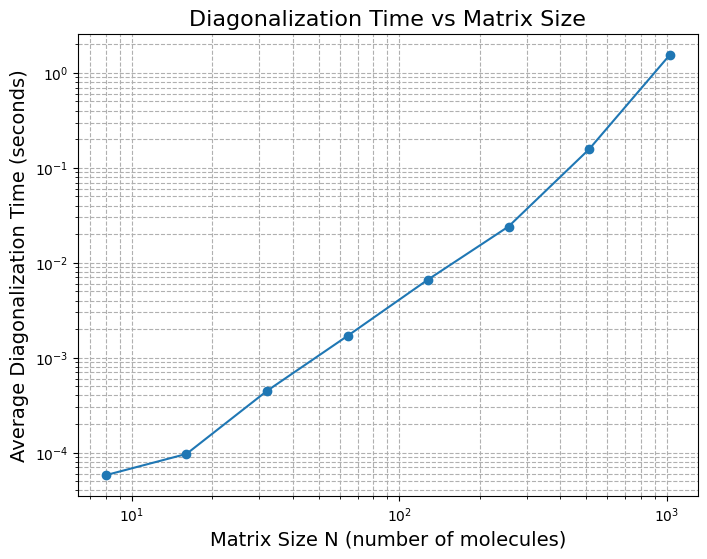

In [60]:
plt.figure(figsize=(8,6))
plt.loglog(plot_N, plot_times, marker='o', linestyle='-')
plt.xlabel('Matrix Size N (number of molecules)', fontsize=14)
plt.ylabel('Average Diagonalization Time (seconds)', fontsize=14)
plt.title('Diagonalization Time vs Matrix Size', fontsize=16)
plt.grid(True, which="both", ls="--")
plt.show()

The bigger the matrix the longer the time. At first it is really quick when matrices are small, for matrices that are 100X100, the time taken to diagonalize it was still under $10^{-2}$ seconds. However when the matrix reached N = 1000 then it took a bit more than a second, which can take quite long when having many counts, or repetitions.



**(c)**

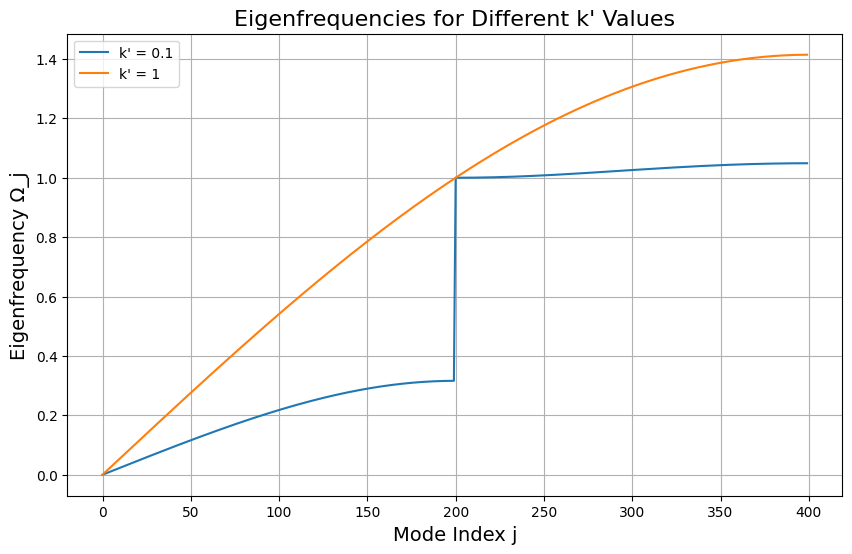

In [63]:
k_prime=0.1
k=1
k_prime2=1
N_c = 200
delta2_c1 = (k_prime/k)
delta2_c2 = (k_prime2/k)
evals1, evecs1, M = diagonalization(delta2_c1, N_c)
evals2, evecs2, M2 = diagonalization(delta2_c2, N_c)



plt.figure(figsize=(10,6))
plt.plot(np.sqrt(np.clip(evals1, 0, None)), label="k' = 0.1")#np.clip takes the array evals1 and replaces every negative value with 0 and let's all the other values unchanged.
plt.plot(np.sqrt(np.clip(evals2, 0, None)), label="k' = 1")
plt.xlabel('Mode Index j', fontsize=14)
plt.ylabel('Eigenfrequency Ω_j', fontsize=14)
plt.title('Eigenfrequencies for Different k\' Values', fontsize=16)
plt.legend()
plt.grid()
plt.show()

When k' = 0.1, the gap between acoustic and optical branches is very big. When k' is =1 there isn't a gap since both intermolecular and intramolecular 'springs' are the same, it is like a big homogenuous chain. 

**(d)**


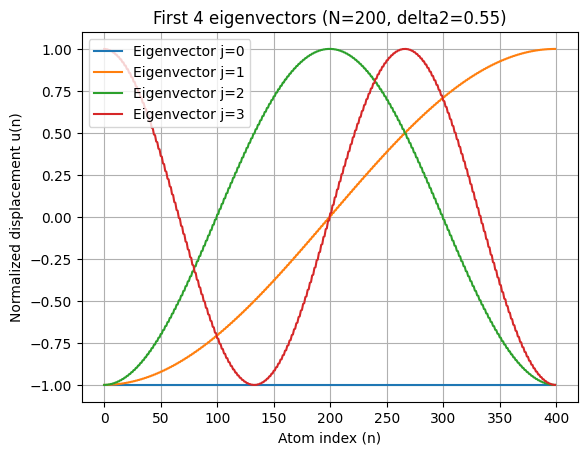

In [65]:
j = [0,1,2,3]
atom_indices = np.arange(2*N_c) # 0 ... 2N-1

for k in j:
    vec = evecs1[:,k].real
    vec = vec/np.max(np.abs(vec))
    plt.plot(atom_indices, vec, label = f'Eigenvector j={k}')
plt.xlabel('Atom index (n)') 
plt.ylabel('Normalized displacement u(n)')
plt.title(f'First 4 eigenvectors (N={N_c}, delta2={delta2})')
plt.legend()
plt.grid(True)
plt.show()

This graph shows a very obvious acoustic branche. The atoms for some sort of wave, exactly how we'd expect it. The first eigenvector, which is laying completely flat on the bottom, is expected as it represents the chain moving along in one piece. 

**(e)**

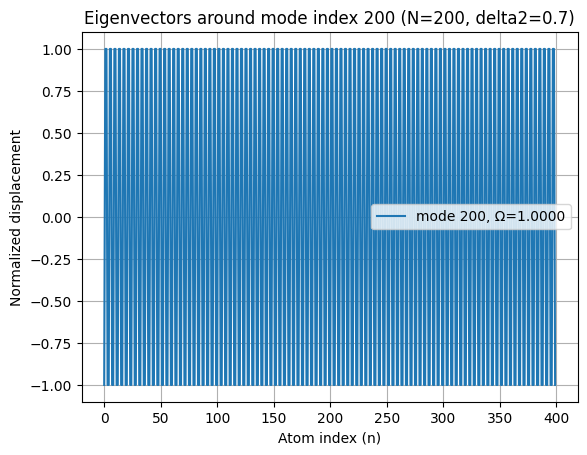

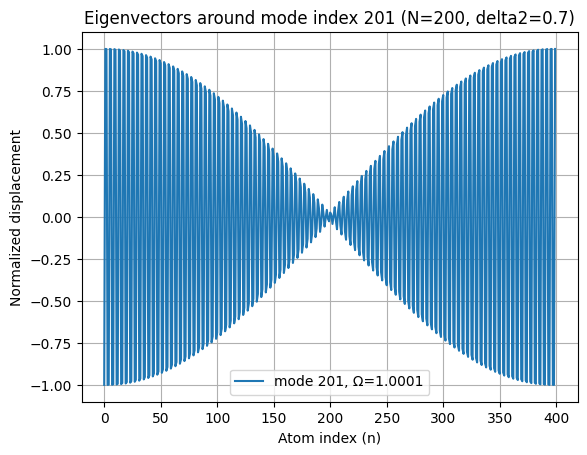

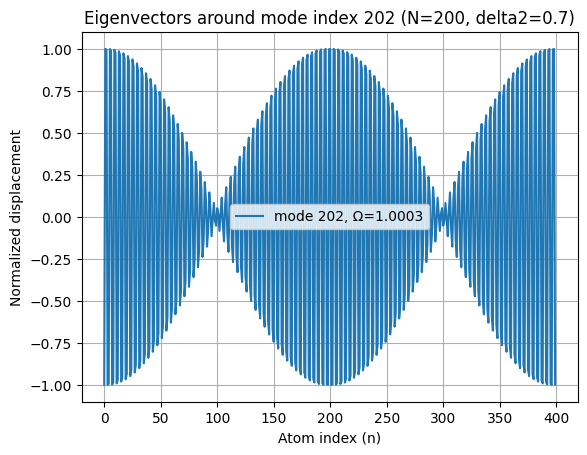

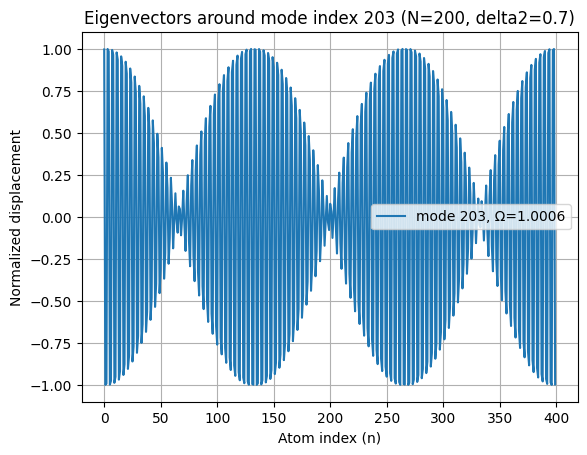

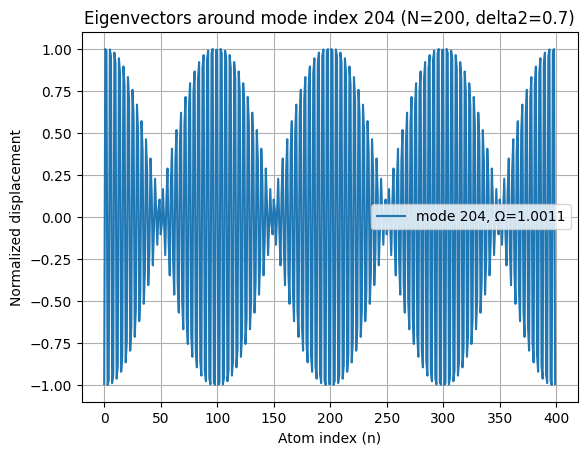

In [139]:

N_e = 200
delta2_e = (0.7)

evals_e, evecs_e, M = diagonalization(delta2_e, N_e)

omega = np.sqrt(np.clip(evals_e,0, None)) #np.clip creates a conditions: if evals_e is less the 0 then it will be equal to zero, everything on top is unchaged 
atom_indices_e = np.arange(2*N_e) # 0 ... 2N-1
j_values = [N_e + i for i in range(0,5)]

for idx in j_values:
    if idx < len(evecs_e):
        vec = evecs_e[:, idx].real
        vec = vec / np.max(np.abs(vec))
        
        plt.plot(atom_indices_e, vec, label=f'mode {idx}, Ω={omega[idx]:.4f}')

        plt.xlabel('Atom index (n)')
        plt.ylabel('Normalized displacement')
        plt.title(f'Eigenvectors around mode index {idx} (N={N_e}, delta2={delta2_e})')
        plt.legend()
        plt.grid()
        plt.show()

When we look at further molecules, the value of omega increases slowly. It increases slowly which makes sense according to the graph underneath, the orange line (optical branch) becomes almost horizontal at N = 200. The first graph is perfectly harmonic and oscillates with a frequency = 1, meaning it stays like this, with maximum displacement.

# 6.Acoustic and optical branches


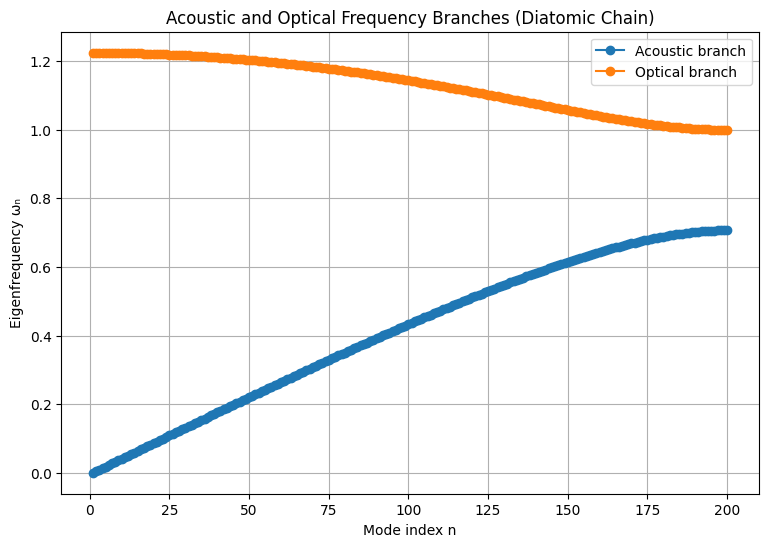

In [142]:
N_6 = 200
k_prime = 0.5
k=1
delta2_6 = (k_prime/k)  


evals6, evecs6, M = diagonalization(delta2_6, N_6)
omega = np.sqrt(np.clip(evals6, 0, None))

# Acoustic branch: ω1, ω2, ..., ωN
omega_acoustic = omega[:N_6]
n_acoustic = np.arange(1, N_6+1)

# Optical branch: (N, ωN+1), (N-1, ωN+2), …
omega_optical = omega[N_6:]        # reverse the second half
n_optical = np.arange(1, N_6+1)[::-1]    # N, N-1, ..., 1


plt.figure(figsize=(9,6))

plt.plot(n_acoustic, omega_acoustic, 'o-', label='Acoustic branch')
plt.plot(n_optical, omega_optical, 'o-', label='Optical branch')

plt.xlabel("Mode index n")
plt.ylabel("Eigenfrequency ωₙ")
plt.title("Acoustic and Optical Frequency Branches (Diatomic Chain)")
plt.grid(True)
plt.legend()
plt.show()


This graph looks similar to the one on wikipedia, if k_prime is changed the gap between the two branches will get bigger or smaller as it can be expected. Also, if we look at the graph from part 5 (c), we can see a strong similarity to the line that corresponds to k' = 0.1, except that other graph continues further whereas this one inverses the data of the optical part (so the maximum is 200 and not 400). We can set k' = 1 which will connect both of the curves, which is what we found in the part 5 (c).

# 7. Extra

N=50:  max error = 1.941e-16
N=100:  max error = 1.249e-16
N=200:  max error = 1.102e-16
N=400:  max error = 1.348e-16
N=800:  max error = 9.721e-17
N=1200:  max error = 2.292e-16
N=2000:  max error = 6.453e-17
N=4000:  max error = 4.077e-17


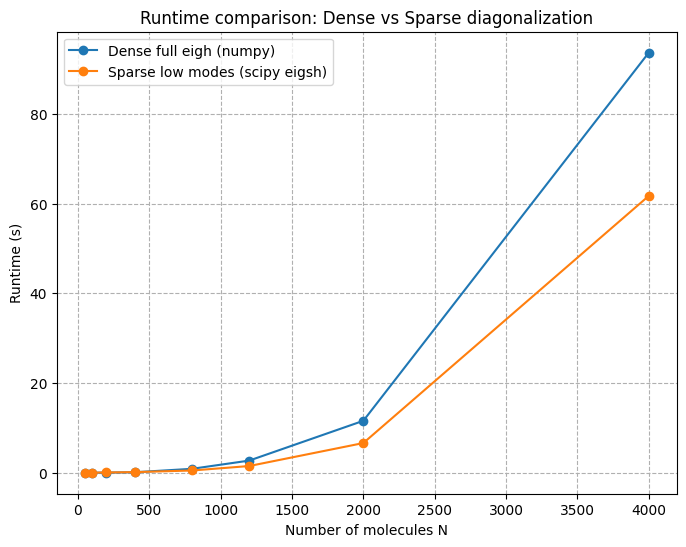

In [134]:

from scipy.sparse import lil_matrix, csr_matrix
from scipy.sparse.linalg import eigsh

def eigen_dense(delta2, N):
    M = matrix_M(delta2, N)
    vals, vecs = np.linalg.eigh(M)
    return vals, vecs


def matrix_M_sparse(delta2, N): #same thing then the first matrix_M but with scipy
    n = 2*N
    M = lil_matrix((n,n))

    for j in range(n):
        if j == 0:
            M[j,j] = 0.5
        elif j == n-1:
            M[j,j] = 0.5
        else:
            M[j,j] = 0.5*(1+delta2)

        if j % 2 == 0 and j+1 < n:
            M[j,j+1] = M[j+1,j] = -0.5
        if j % 2 == 1 and j+1 < n:
            M[j,j+1] = M[j+1,j] = -0.5*delta2

    return M.tocsr() #this is used to convert the matrix in a compressed sparse row format. 
#This can be used for calculations of the eigenvalues but also doesn't use as much memory since the values =0 aren't kept 


def eigen_sparse(delta2, N, k_small=20): #Calculates the first 20 eigenvalues and eigenvectors 
    """Compute lowest k_small eigenvalues (acoustic modes)."""
    M = matrix_M_sparse(delta2, N)
    vals, vecs = eigsh(M, k=k_small, which='SM')
    return np.sort(vals), vecs


delta2 = 0.1
N_values = [50, 100, 200, 400, 800, 1200, 2000, 4000]

dense_times = []#list
sparse_times = []#list
errors = []      # comparison between sparse & dense eigenvalues

for N in N_values:
    
    t0 = time.perf_counter()
    evals_dense, _ = eigen_dense(delta2, N)
    t1 = time.perf_counter()
    dense_times.append(t1 - t0) #time is measured for the dense graph

    
    t0 = time.perf_counter()
    evals_sparse, _ = eigen_sparse(delta2, N, k_small=20)
    t1 = time.perf_counter()
    sparse_times.append(t1 - t0) #time is measured for the sparse matrix but only the first 20 values

    
    diff = np.max(np.abs(evals_dense[:20] - evals_sparse))# this is to check the error between the sparse and dense measurements, to see if we lose precision when using quicker methods
    errors.append(diff)

    print(f"N={N}:  max error = {diff:.3e}")


plt.figure(figsize=(8,6))
plt.plot(N_values, dense_times, 'o-', label="Dense full eigh (numpy)")
plt.plot(N_values, sparse_times, 'o-', label="Sparse low modes (scipy eigsh)")
plt.xlabel("Number of molecules N")
plt.ylabel("Runtime (s)")
plt.title("Runtime comparison: Dense vs Sparse diagonalization")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()




At first, the dense and sparse compute at the same speed, both are really quick. However, when matrices become much bigger the difference is more obvious. The sparse method allows calculating the eigenvalues and eigenvectors of the first few modes whereas the dense method has to compute all of the matrix and cannot isolate a small group efficiently. We can isolate the beginning, the end or a part of interest with the sparse method and can be used even when N is extremely big. It's not always useful, when N is small is is easier (and sometimes quicker)to use the dense method. Also, the errors between the two methods are negligeable, we aren't sacrificing precision by changing methods.